In [1]:
from mpmath import mp, sqrt, mpc
I = mpc(0,1)
from time import time
mp.dps = 30
from ParametrizedTriangleGroup import DeformTriangleSolution_parametrized
from itertools import product
import multiprocessing, copy, os

In [45]:
from plot_csv import plot_csv

In [236]:
p =  4.797 + I*0.086

In [237]:
DTS = DeformTriangleSolution_parametrized(p, n=4, param_key = '/length_7/resolution_30000000', admissible_error = 1e-25)

Parametrization loaded: /length_7/resolution_30000000. 
        10324181 points, from 103861 attractive fixed points.


In [238]:
DTS.compute_limit_set()

Limit set computed, with 10324181 points
        68.02707886695862: 21.35968589782715 puis 46.66739296913147


In [239]:
DTS.export_csv(prec = 15)

Exporting


In [240]:
plot_csv('../data/'+DTS.name+'/csv/' + DTS.parameter_name + '_3d.csv')

In [241]:
import pandas as pd
import numpy as np
import matplotlib

In [242]:
to_plot = pd.read_csv('../data/334/csv/4.460_0.000_3d.csv')

In [243]:
to_plot = to_plot.set_index('theta')

In [244]:
center = {'x':0.15202,'y':-0.231575}
height = .00001
bxm, bxp = center['x'] - height, center['x'] + height
bym, byp = center['y'] - height, center['y'] + height

filtering = np.all([to_plot['x']<bxp,to_plot['x']>bxm,to_plot['y']<byp,to_plot['y']>bym],axis = 0)
to_plot_loc= to_plot[filtering]

<AxesSubplot:xlabel='x', ylabel='y'>

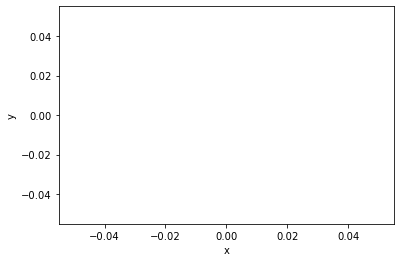

In [245]:
to_plot_loc.plot(x='x',y='y', kind = 'scatter', s = 1)

In [151]:
def zoom(k):
    center = {'x':0.00204,'y':-0.01716}
    height = 10**(-k)
    bxm, bxp = center['x'] - height, center['x'] + height
    bym, byp = center['y'] - height, center['y'] + height

    filtering = np.all([to_plot['x']<bxp,to_plot['x']>bxm,to_plot['y']<byp,to_plot['y']>bym],axis = 0)
    to_plot_loc= to_plot[filtering]
    fig = to_plot_loc.plot(x='x',y='y', kind = 'scatter', s = 1)
    return fig

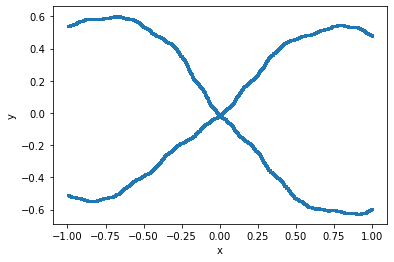

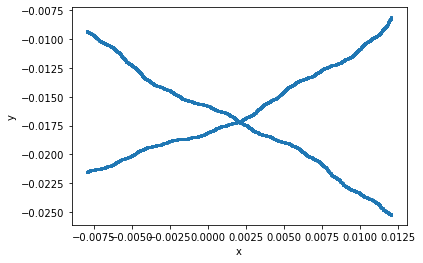

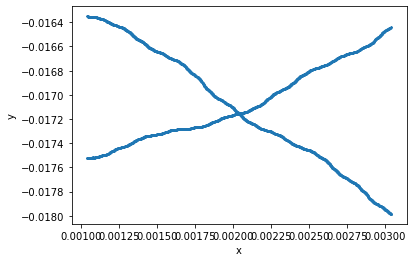

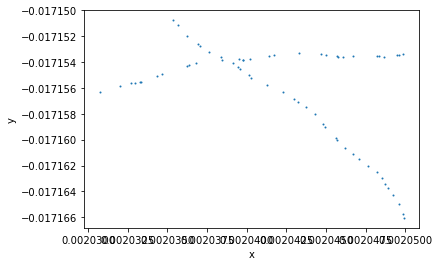

In [152]:
for k in range(6):
    zoom(k)

In [229]:
to_plot['zz'] = to_plot.x**2+to_plot.y**2

In [230]:
len(to_plot.index)

347326

In [231]:
p1 = to_plot.loc[min(to_plot.index)]
p2 = to_plot.iloc[int(np.floor(len(to_plot.index)/2))]
[x1,y1,t1,zz1] = p1
[x2,y2,t2,zz2] = p2

In [232]:
I = 1j

In [233]:
to_plot['b_p1'] = ((-zz1 -I*t1) + (-to_plot.zz+I*to_plot.t) + 2 * (x1-I*y1)*(to_plot.x + I*to_plot.y))
to_plot['b_p2'] = ((-zz2 -I*t2) + (-to_plot.zz+I*to_plot.t) + 2 * (x2-I*y2)*(to_plot.x + I*to_plot.y))
to_plot['bir'] = np.arctan(np.abs(to_plot.b_p1/to_plot.b_p2))

In [234]:
to_plot.iloc[int(np.floor(len(to_plot.index)/2))].bir

(1.5707963267948966+0j)

In [235]:
to_plot.plot(y='bir')

<AxesSubplot:xlabel='theta'>

In [164]:
b(p1,p2)

(-0.437860194650277713224803138324 - 2.15857415442022976885657093451j)

In [165]:
to_plot['bir'] = to_plot.apply(lambda row: b(p1,row)/b(p2,row),axis=1) 

KeyboardInterrupt: 